In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [41]:
# Done after the submission Data, hence answers already known and looked at. 

import pandas as pd
import numpy as np
import tensorflow as tf

# fixing the random seed for reproducibility
np.random.seed(50)
tf.random.set_seed(50)

# Saving the filepath of 'Phishing.csv' saved in the GitHub repository
filepath = "https://raw.githubusercontent.com/sayakpaul/Manning-Phishing-Websites-Detection/master/Phishing.csv"

# Loading the .csv into a DataFrame
myData = pd.read_csv(filepath)

In [3]:
myData.head(10)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1


#Trying sample function, not used before

In [4]:
myData.sample(12)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
6491,-1,-1,1,1,1,-1,0,0,1,1,...,1,1,-1,1,-1,-1,1,1,1,-1
2060,1,-1,1,1,1,-1,-1,1,-1,1,...,1,1,1,1,1,-1,1,0,1,1
4820,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,1,1,1,1,1
5098,1,-1,1,1,1,-1,0,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,1,-1
4691,1,-1,1,1,1,-1,-1,-1,-1,1,...,1,1,-1,1,1,-1,1,0,1,-1
1331,1,-1,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,-1,-1,1,1,1,-1
4374,1,-1,1,1,1,1,0,1,1,1,...,1,1,1,-1,1,1,1,1,1,1
5816,-1,-1,-1,-1,-1,-1,1,0,-1,-1,...,-1,1,-1,-1,0,-1,1,-1,1,-1
4366,1,1,1,1,1,-1,0,1,-1,-1,...,-1,1,-1,1,1,-1,1,0,-1,1
1848,1,-1,1,-1,1,1,1,1,-1,1,...,1,1,1,1,1,1,1,0,1,1


In [5]:
myData.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [6]:
#Columns and raws 
myData.info

<bound method DataFrame.info of        having_IP_Address  URL_Length  Shortining_Service  having_At_Symbol  \
0                     -1           1                   1                 1   
1                      1           1                   1                 1   
2                      1           0                   1                 1   
3                      1           0                   1                 1   
4                      1           0                  -1                 1   
...                  ...         ...                 ...               ...   
11050                  1          -1                   1                -1   
11051                 -1           1                   1                -1   
11052                  1          -1                   1                 1   
11053                 -1          -1                   1                 1   
11054                 -1          -1                   1                 1   

       double_slash_redirecting

In [7]:
#Number of records and features 
myData.shape

(11055, 31)

In [8]:
myData['Result'].unique()

array([-1,  1])

In [9]:
#T attributed notes during the revision
myData.T
#Column headers clear 


,0,1,2,3,4,5,6,7,8,9,...,11045,11046,11047,11048,11049,11050,11051,11052,11053,11054
having_IP_Address,-1,1,1,1,1,-1,1,1,1,1,...,1,-1,-1,1,-1,1,-1,1,-1,-1
URL_Length,1,1,0,0,0,0,0,0,0,1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,-1
Shortining_Service,1,1,1,1,-1,-1,-1,1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
having_At_Symbol,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,-1,-1,1,1,1
double_slash_redirecting,-1,1,1,1,1,-1,1,1,1,1,...,1,1,1,1,-1,1,-1,1,1,1
Prefix_Suffix,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,-1,-1
having_Sub_Domain,-1,0,-1,-1,1,1,-1,-1,1,-1,...,1,1,1,-1,1,1,1,1,-1,-1
SSLfinal_State,-1,1,-1,-1,1,1,-1,-1,1,1,...,-1,1,-1,1,-1,1,-1,-1,-1,-1
Domain_registeration_length,-1,-1,-1,1,-1,-1,1,1,-1,-1,...,-1,-1,-1,1,1,-1,-1,-1,1,1
Favicon,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,-1,-1,1,-1,1


In [ ]:
myData.head(5).T

In [10]:
myData.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
resultsData=myData['Result'].unique()

In [12]:
resultsData

array([-1,  1])

In [23]:
myResultsData=myData['Result'].value_counts()

In [24]:
myResultsDataAsArray=np.array(myResultsData)

In [16]:
myResultsDataAsArray

array([6157, 4898])

In [25]:
myResultsDataAsArray[1]

4898

In [18]:
data = np.array([['','Class','Num_Observations'],
                ['0',resultsData[0],myResultsDataAsArray[0]],
                ['1',resultsData[1],myResultsDataAsArray[1]]])
                
print(pd.DataFrame(data=data[1:,1:],
                  index=data[1:,0],
                  columns=data[0,1:]))

  Class Num_Observations
0    -1             6157
1     1             4898


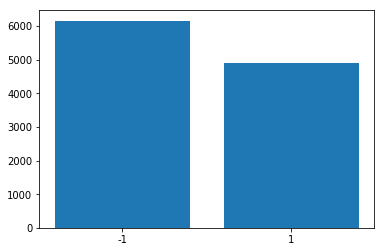

In [19]:
import matplotlib.pyplot as plt
# aggreate the data 
height = [myResultsDataAsArray[0],myResultsDataAsArray[1]]
bars = (resultsData[0], resultsData[1])
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

In [20]:
myData.describe().T

,count,mean,std,min,25%,50%,75%,max
having_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,11055.0,0.700588,0.713598,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11055.0,0.628584,0.777777,-1.0,1.0,1.0,1.0,1.0


The replacement of -1 with 0

In [42]:
myData['Result']=myData['Result'].replace([-1],0)

In [44]:
myData.head(10).T

,0,1,2,3,4,5,6,7,8,9
having_IP_Address,-1,1,1,1,1,-1,1,1,1,1
URL_Length,1,1,0,0,0,0,0,0,0,1
Shortining_Service,1,1,1,1,-1,-1,-1,1,-1,-1
having_At_Symbol,1,1,1,1,1,1,1,1,1,1
double_slash_redirecting,-1,1,1,1,1,-1,1,1,1,1
Prefix_Suffix,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
having_Sub_Domain,-1,0,-1,-1,1,1,-1,-1,1,-1
SSLfinal_State,-1,1,-1,-1,1,1,-1,-1,1,1
Domain_registeration_length,-1,-1,-1,1,-1,-1,1,1,-1,-1
Favicon,1,1,1,1,1,1,1,1,1,1


In [38]:
# Saving the filepath of 'Phishing.csv' saved in the GitHub repository
filepath = "https://raw.githubusercontent.com/sayakpaul/Manning-Phishing-Websites-Detection/master/Phishing.csv"

# Loading the .csv into a DataFrame
myData = pd.read_csv(filepath, header =None)


In [29]:
myData.T

,0,1,2,3,4,5,6,7,8,9,...,11046,11047,11048,11049,11050,11051,11052,11053,11054,11055
0,having_IP_Address,-1,1,1,1,1,-1,1,1,1,...,1,-1,-1,1,-1,1,-1,1,-1,-1
1,URL_Length,1,1,0,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,1,-1,-1,-1
2,Shortining_Service,1,1,1,1,-1,-1,-1,1,-1,...,1,1,1,1,1,1,1,1,1,1
3,having_At_Symbol,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,-1,-1,1,1,1
4,double_slash_redirecting,-1,1,1,1,1,-1,1,1,1,...,1,1,1,1,-1,1,-1,1,1,1
5,Prefix_Suffix,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,-1,-1
6,having_Sub_Domain,-1,0,-1,-1,1,1,-1,-1,1,...,1,1,1,-1,1,1,1,1,-1,-1
7,SSLfinal_State,-1,1,-1,-1,1,1,-1,-1,1,...,-1,1,-1,1,-1,1,-1,-1,-1,-1
8,Domain_registeration_length,-1,-1,-1,1,-1,-1,1,1,-1,...,-1,-1,-1,1,1,-1,-1,-1,1,1
9,Favicon,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,-1,-1,1,-1,1


On the missing values non is noted.

In [30]:
(myData[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]]==0).sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
dtype: int64

Looking at the dataset i see no missing values. I am still checking but i see not missing values yet


In [32]:
y

0        Result
1            -1
2            -1
3            -1
4            -1
          ...  
11051         1
11052        -1
11053        -1
11054        -1
11055        -1
Name: 30, Length: 11056, dtype: object

In [46]:
y=myData['Result'].replace([-1],0)

The target class is y i.e the result with the values being either 0 or 1.

In [47]:
y

0        0
1        0
2        0
3        0
4        1
        ..
11050    1
11051    0
11052    0
11053    0
11054    0
Name: Result, Length: 11055, dtype: int64

In [48]:
x=myData.drop(['Result'],axis=1)

x is the features from the dataset. That is predictors/ input/independent variables.

In [49]:
x

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,-1,1,1,-1,-1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,1,-1,1,1,1,1,1,1,-1,1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,1,-1,1,0,1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,1,-1,1,1,1,1,-1,1,1,1


So this are the features to be used x with no target class. 

In [50]:
x.T

,0,1,2,3,4,5,6,7,8,9,...,11045,11046,11047,11048,11049,11050,11051,11052,11053,11054
having_IP_Address,-1,1,1,1,1,-1,1,1,1,1,...,1,-1,-1,1,-1,1,-1,1,-1,-1
URL_Length,1,1,0,0,0,0,0,0,0,1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,-1
Shortining_Service,1,1,1,1,-1,-1,-1,1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
having_At_Symbol,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,-1,-1,1,1,1
double_slash_redirecting,-1,1,1,1,1,-1,1,1,1,1,...,1,1,1,1,-1,1,-1,1,1,1
Prefix_Suffix,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,-1,-1
having_Sub_Domain,-1,0,-1,-1,1,1,-1,-1,1,-1,...,1,1,1,-1,1,1,1,1,-1,-1
SSLfinal_State,-1,1,-1,-1,1,1,-1,-1,1,1,...,-1,1,-1,1,-1,1,-1,-1,-1,-1
Domain_registeration_length,-1,-1,-1,1,-1,-1,1,1,-1,-1,...,-1,-1,-1,1,1,-1,-1,-1,1,1
Favicon,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,-1,-1,1,-1,1


Importing the library for the spliting of the data. 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8,random_state=1)

In [ ]:
len(y_train)

Checking the size of the train data:

In [ ]:
len(x_train)

In [ ]:
len(x_test)